In [4]:
###### import libraries
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from googletrans import Translator
translator = Translator()

In [7]:
tweets_data_path = 'data1.txt'


In [6]:
tweets_data = []
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
    
print (len(tweets_data))
print(tweets_data)

690
[{'created_at': 'Wed Oct 24 06:30:42 +0000 2018', 'id': 1054983504013025280, 'id_str': '1054983504013025280', 'text': 'RT @LuisitoComunica: Chul compró una mascarilla de Jigglypuff en Japón. No sé qué clase de Jigglypuff es éste JAJAJA https://t.co/dtKip882YB', 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 485358914, 'id_str': '485358914', 'name': 'Machichi', 'screen_name': 'Machichi24', 'location': None, 'url': None, 'description': '•Hermosillo Son•  \n•Solo dios sabe porque hace las cosas•', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 332, 'friends_count': 272, 'listed_count': 1, 'favourites_count': 2546, 'statuses_count': 16810, 'created_at': 'Tue Feb 07 03:41:32 +0000 2012', 'utc_offset': None,

In [7]:
list_text=[]
list_creat_time=[]
list_location=[]
list_favcount=[]
list_follwers_count=[]
list_lang=[]

In [8]:
#function to return value by getting a key
def extractdata(pos,key):
    
    x=tweets_data[pos]
    if ('user' in x): 
        if (key=='location' or key=='favourites_count' or key=='followers_count' or key=='list_lang'):
            y=x['user']
            return (y[key])
        else:
            if (key in x):
                return (x[key])
            else:
                return('')
    else:
        return('')

In [9]:
#looping for dimensionality reduction
for i in range(len(tweets_data)):
    
    list_text.append(extractdata(i,'text'))
    list_creat_time.append(extractdata(i,'created_at'))
    list_location.append(extractdata(i,'location'))
    list_favcount.append(extractdata(i,'favourites_count'))
    list_follwers_count.append(extractdata(i,'followers_count'))
    list_lang.append(extractdata(i,'lang'))

In [10]:
#convert those extracted list to Dataframe
dr_tweet_df = pd.DataFrame({'text':list_text,'language':list_lang,'created_at':list_creat_time,'location':list_location,'fav_count':list_favcount,'followers_count':list_follwers_count})         



In [11]:
#remove blank row in dataframe
z=[]
for i in range (len(list_text)):
    if (list_text[i]==''):
        z.append(i)

for i in range (len(z)):
    dr_tweet_df.drop(dr_tweet_df.index[z[i]-i], inplace=True)


TypeError: Empty 'DataFrame': no numeric data to plot

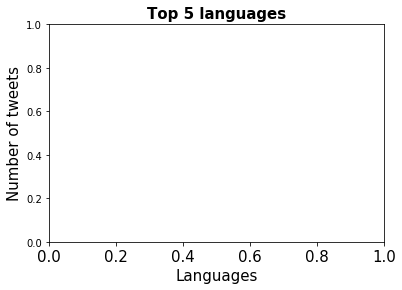

In [12]:
# some analytics
tweets_by_lang = dr_tweet_df['language'].value_counts()
#showing top 5 no of tweets according to language
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='red') 

# some analytics
tweets_by_location = dr_tweet_df['location'].value_counts()
#showing top 5 no of tweets according to location
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('location', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 3 location', fontsize=15, fontweight='bold')
tweets_by_location[:3].plot(ax=ax, kind='bar', color='red') 

In [38]:
dr_tweet_df['followers_count'].describe()

count     12728
unique     3335
top           0
freq        168
Name: followers_count, dtype: int64

In [39]:
dr_tweet_df['followers_count'].mean() #mean of total follower counts

4907.320003142678

In [40]:
dr_tweet_df


,text,language,created_at,location,fav_count,followers_count
3,RT @JesseFFerguson: BREAKING from FOX 5 (Georg...,en,Wed Oct 24 17:07:19 +0000 2018,None,108791,530
4,RT @ayanami0304: 似てるw,ja,Wed Oct 24 17:07:19 +0000 2018,合衆国日本,20919,267
5,RT @LAY_zhang_: Namanana is my favorite song o...,en,Wed Oct 24 17:07:19 +0000 2018,"Seoul, Republic of Korea",1413,124
6,サンタさん……来ないよね？,ja,Wed Oct 24 17:07:19 +0000 2018,None,21,74
9,"RT @hopeworldians: Aoki has Blink 182, Lady An...",en,Wed Oct 24 17:07:19 +0000 2018,"California, USA",17525,118
11,"RT @MrsGandhi: I Agree @Sagarikaghose, bodily ...",en,Wed Oct 24 17:07:19 +0000 2018,None,7248,26
12,嵐さん、スタジアムツアーやるとして。北海道は❔北海道無いとかないよね❔❔北海道から他って飛行...,ja,Wed Oct 24 17:07:19 +0000 2018,ヒンナヒンナ🐻,5,2
13,RT @YahooNewsYuru: ＼試してみたい☕️／\nローソンで話題の「クリームだけ...,ja,Wed Oct 24 17:07:19 +0000 2018,新潟県,55172,142
14,@beat_f @lucky_17a そんな言い方なんだーか,ja,Wed Oct 24 17:07:19 +0000 2018,ゆかり王国,6547,440
15,RT @volopacem: 회사 채용 프로세스를 보다보면 확실히 지원자도 여남에 따...,ko,Wed Oct 24 17:07:19 +0000 2018,None,10559,44


In [41]:
dr_tweet_df=dr_tweet_df.reset_index()
dr_tweet_df

,index,text,language,created_at,location,fav_count,followers_count
0,3,RT @JesseFFerguson: BREAKING from FOX 5 (Georg...,en,Wed Oct 24 17:07:19 +0000 2018,None,108791,530
1,4,RT @ayanami0304: 似てるw,ja,Wed Oct 24 17:07:19 +0000 2018,合衆国日本,20919,267
2,5,RT @LAY_zhang_: Namanana is my favorite song o...,en,Wed Oct 24 17:07:19 +0000 2018,"Seoul, Republic of Korea",1413,124
3,6,サンタさん……来ないよね？,ja,Wed Oct 24 17:07:19 +0000 2018,None,21,74
4,9,"RT @hopeworldians: Aoki has Blink 182, Lady An...",en,Wed Oct 24 17:07:19 +0000 2018,"California, USA",17525,118
5,11,"RT @MrsGandhi: I Agree @Sagarikaghose, bodily ...",en,Wed Oct 24 17:07:19 +0000 2018,None,7248,26
6,12,嵐さん、スタジアムツアーやるとして。北海道は❔北海道無いとかないよね❔❔北海道から他って飛行...,ja,Wed Oct 24 17:07:19 +0000 2018,ヒンナヒンナ🐻,5,2
7,13,RT @YahooNewsYuru: ＼試してみたい☕️／\nローソンで話題の「クリームだけ...,ja,Wed Oct 24 17:07:19 +0000 2018,新潟県,55172,142
8,14,@beat_f @lucky_17a そんな言い方なんだーか,ja,Wed Oct 24 17:07:19 +0000 2018,ゆかり王国,6547,440
9,15,RT @volopacem: 회사 채용 프로세스를 보다보면 확실히 지원자도 여남에 따...,ko,Wed Oct 24 17:07:19 +0000 2018,None,10559,44


In [42]:
#-------------------------------------------------------------Example

In [43]:
#translation
import goslate

In [44]:
# Imports the Google Cloud client library
#from google.cloud import translate

# Instantiates a client
#translate_client = translate.Client()

# The text to translate
#text = u'Hello, world!'
# The target language
#target = 'ru'

# Translates some text into Russian
#translation = translate_client.translate(
    #text,
    #target_language=target)

#print(u'Text: {}'.format(text))
#print(u'Translation: {}'.format(translation['translatedText']))

In [45]:
text = "Hello World"

gs = goslate.Goslate()
translatedText = gs.translate(text,'fr')
translatedText

HTTPError: HTTP Error 503: Service Unavailable

In [46]:
dr_tweet_df['text'][6]

'嵐さん、スタジアムツアーやるとして。北海道は❔北海道無いとかないよね❔❔北海道から他って飛行機しかないんだよ❔高いよ❔'

In [23]:
translatedText = gs.translate(dr_tweet_df['text'][6],'en')
translatedText

'Arashi, as a stadium tour. Hokkaido does not have ❔ Hokkaido 無 無 ね ❔❔ ❔❔ There is only an airplane other than Hokkaido ❔ It is high ❔'

---

In [ ]:
# converting all other language to english

In [25]:
for i in range (len(dr_tweet_df['language'])):
    if (dr_tweet_df['language'][i] != "en"):
        translatedText = gs.translate(dr_tweet_df['text'][i],'en')
        dr_tweet_df['text'][i]==translatedText
        print(translatedText)
        
        

HTTPError: HTTP Error 503: Service Unavailable

In [55]:
## Prioritization
## dropping tweet based on their like and followers
#remove blank row in dataframe
z=[]
for i in range (len(dr_tweet_df['fav_count'])):
    if (list_text[i]==''):
        z.append(i)
        
        list_favcount=[]
list_follwers_count=[]

for i in range (len(z)):
    dr_tweet_df.drop(dr_tweet_df.index[z[i]-i], inplace=True)

12728

0         en
1         ja
2         en
3         ja
4         en
5         en
6         ja
7         ja
8         ja
9         ko
10       und
11        in
12       und
13        pt
14        fr
15        sr
16        en
17        en
18        en
19        ar
20        pt
21        es
22        ko
23       und
24        fr
25       und
26        pt
27        en
28        es
29        pt
        ... 
12698     hi
12699     ko
12700     th
12701     in
12702     ja
12703     ja
12704     ja
12705     en
12706     en
12707    und
12708     en
12709     en
12710    und
12711     en
12712     ar
12713     en
12714     en
12715     es
12716     es
12717     en
12718     es
12719     pt
12720     en
12721     en
12722     ar
12723     es
12724     en
12725     ar
12726     ar
12727     ja
Name: language, Length: 12728, dtype: object


'en'